In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg #uses PIL if available. 

from data_loader import get_loader, FlickrDataset, Vocabulary

In [2]:
resources = '../resources/flickr8k/'
images_path = resources + 'Images/'
captions_path = resources + 'captions.txt'

In [3]:
caps = pd.read_csv(captions_path)
caps.head(10)

,image,caption
0,1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...
1,1000268201_693b08cb0e.jpg,A girl going into a wooden building .
2,1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
3,1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playh...
4,1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a woo...
5,1001773457_577c3a7d70.jpg,A black dog and a spotted dog are fighting
6,1001773457_577c3a7d70.jpg,A black dog and a tri-colored dog playing with...
7,1001773457_577c3a7d70.jpg,A black dog and a white dog with brown spots a...
8,1001773457_577c3a7d70.jpg,Two dogs of different breeds looking at each o...
9,1001773457_577c3a7d70.jpg,Two dogs on pavement moving toward each other .


Shape: (500, 375, 3)


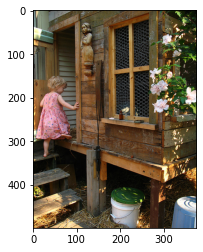

0 A child in a pink dress is climbing up a set of stairs in an entry way .
1 A girl going into a wooden building .
2 A little girl climbing into a wooden playhouse .
3 A little girl climbing the stairs to her playhouse .
4 A little girl in a pink dress going into a wooden cabin .


In [4]:
image = caps['image'].iloc[0]
captions = caps.loc[caps['image']==image, 'caption']

img=mpimg.imread(images_path+image)
print('Shape:', np.shape(img.tolist()))
plt.imshow(img)
plt.show()

for i,c in enumerate(captions):
    print(i,c)

### Test Vocabulary

In [5]:
vocab = Vocabulary(unk_cutoff=0)
vocab.fit(["i don't like dogs","i don't like cats"])
vocab.word_to_idx

{'<PAD>': 0,
 '<START>': 1,
 '<END>': 2,
 '<UNK>': 3,
 'cats': 4,
 'do': 5,
 'dogs': 6,
 'i': 7,
 'like': 8,
 "n't": 9}

In [6]:
vocab.numericalize_sentence('i like dogs', add_start_end=True)

[1, 7, 8, 6, 2]

### FlickrDataset

In [7]:
import torchvision.transforms as transforms

In [8]:
def show_image(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

In [9]:
#defing the transform to be applied
transf = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor()
])

dataset = FlickrDataset(
    images_dir=images_path,
    captions_path=captions_path,
    transform=transf,
    unk_cutoff=1
)


Shape: (3, 224, 224)


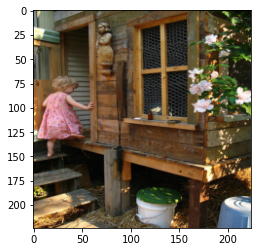

Tokens: tensor([   1,   68, 1407, 3745,   68, 5388, 2290, 3836, 1511, 7983,   68, 6404,
        4894, 7066, 3745,  245, 2511, 8213,   15,    2])
Sentence:
['<START>', 'a', 'child', 'in', 'a', 'pink', 'dress', 'is', 'climbing', 'up', 'a', 'set', 'of', 'stairs', 'in', 'an', 'entry', 'way', '.', '<END>']


In [10]:

img, caps = dataset[0]
print('Shape:', np.shape(img.tolist()))
show_image(img)
print("Tokens:",caps)
print("Sentence:")
print([dataset.vocab.idx_to_word[token] for token in caps.tolist()])

### get_loader

In [14]:
batch_size = 4
num_workers = 1

data_loader = get_loader(
    dataset=dataset,
    batch_size=batch_size,
    num_workers=num_workers,
    batch_first=True,
    shuffle=True
)


captions shape: torch.Size([4, 14])

['<START>', 'two', 'girls', 'sitting', 'beside', 'the', 'water', 'near', 'a', 'tree', '.', '<END>', '<PAD>', '<PAD>']


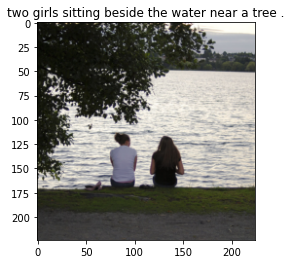

['<START>', 'a', 'guy', 'is', 'on', 'his', 'bicycle', '.', '<END>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']


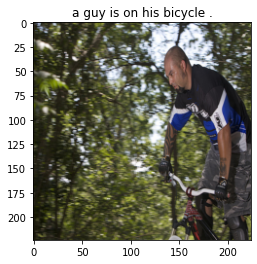

['<START>', 'a', 'brown', 'and', 'black', 'dog', 'running', 'across', 'a', 'grassy', 'field', '<END>', '<PAD>', '<PAD>']


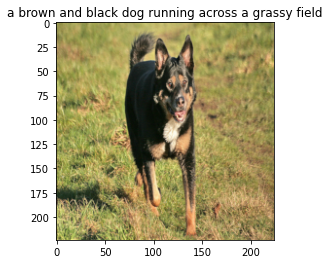

['<START>', 'someone', 'is', 'pulling', 'an', 'inflatable', 'boat', 'with', 'an', 'oar', 'in', 'it', '.', '<END>']


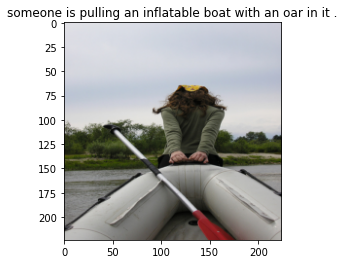

In [19]:
#generating the iterator from the dataloader
dataiter = iter(data_loader)

#getting the next batch
batch = next(dataiter)

#unpacking the batch
images, captions = batch

end = dataset.end_label
print('captions shape:', np.shape(captions))
print()
#showing info of image in single batch
for i in range(batch_size):
    img,cap = images[i],captions[i]
    caption_label = [dataset.vocab.idx_to_word[token] for token in cap.tolist()]
    print(caption_label)
    eos_index = caption_label.index(end)
    caption_label = caption_label[1:eos_index]
    caption_label = ' '.join(caption_label)                      
    show_image(img,caption_label)
    plt.show()

In [20]:
print(captions)

tensor([[   1, 7912, 3154, 6624,  716, 7567, 8179, 4755,   68, 7791,   15,    2,
            0,    0],
        [   1,   68, 3362, 3836, 4918, 3575,  726,   15,    2,    0,    0,    0,
            0,    0],
        [   1,   68, 1012,  250,  776, 2207, 6182,  101,   68, 3270, 2735,    2,
            0,    0],
        [   1, 6873, 3836, 5718,  245, 3770,  846, 8371,  245, 4861, 3745, 3843,
           15,    2]])
